In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 
import shutil


Bad key "text.kerning_factor" on line 4 in
C:\Users\Hawee\AppData\Local\Continuum\anaconda3\envs\dlpy36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
img_id_path = './data/2021MCM_ProblemC_ Images_by_GlobalID.xlsx'

In [3]:
img_dataset_path = './data/2021MCMProblemC_DataSet.xlsx'

In [4]:
img_id_csv = pd.read_excel(img_id_path)

In [5]:
img_id_csv.head()

,FileName,GlobalID,FileType
0,ATT1_DSCN9647.jpg,{5AC8034E-5B46-4294-85F0-5B13117EBEFE},image/jpg
1,ATT10_67EAF187-B59C-4F5F-BAAC-9F76E06A96D6.jpg,{C4F44511-EA53-4FCF-9422-E1C57703720D},image/jpg
2,ATT100_inbound241937372812029587.jpg,{43506835-18B8-46B2-A2CB-586AF9C8ECE6},image/jpg
3,ATT1000_A5A50BAB-A6EF-4576-A1F8-A07862AADE3A.jpg,{E0AE2F2A-38A5-463C-97B5-9F84A477F9AE},image/jpg
4,ATT1001_8B9F8599-61EF-4690-B195-888BCD319F32.png,{1CD14B56-4046-44C4-B1B8-8FB07A9071E9},image/png


In [6]:
img_id_csv= img_id_csv[['FileName','GlobalID']]

In [7]:
img_dataset = pd.read_excel(img_dataset_path)
img_dataset.head()
pd.Timestamp.min.ceil('D')

Timestamp('1677-09-22 00:00:00')

In [8]:
img_dataset=img_dataset[img_dataset['Detection Date']!='<Null>']
img_dataset['Detection Date']=pd.to_datetime(img_dataset['Detection Date'], errors="coerce")
img_dataset = img_dataset.dropna(subset=['Detection Date'])
img_dataset['Detection Date']

0      2019-12-08
1      2019-10-30
2      2020-01-15
3      2019-09-19
4      2019-08-31
          ...    
4435   2020-10-02
4436   2020-08-29
4437   2020-10-23
4438   2020-10-19
4439   2020-08-04
Name: Detection Date, Length: 4434, dtype: datetime64[ns]

In [9]:
img_ds_idindex=img_dataset.set_index('GlobalID')
img_id_idindex=img_id_csv.set_index('GlobalID')

In [11]:
img_id_idindex.join(img_ds_idindex,how='left').info()

<class 'pandas.core.frame.DataFrame'>
Index: 3305 entries, {003166CE-682C-40AD-9850-8F9CB145B79D} to {FFAB9655-A203-47D6-BAFB-BFB0818E7CDD}
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   FileName         3305 non-null   object        
 1   Detection Date   3305 non-null   datetime64[ns]
 2   Notes            3305 non-null   object        
 3   Lab Status       3305 non-null   object        
 4   Lab Comments     3305 non-null   object        
 5   Submission Date  3305 non-null   datetime64[ns]
 6   Latitude         3305 non-null   float64       
 7   Longitude        3305 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 232.4+ KB


In [12]:
hasimg_csv=img_id_idindex.join(img_ds_idindex,how='left')

In [13]:
hasimg_csv=hasimg_csv.reset_index()

In [16]:
num_classes = hasimg_csv['Lab Status'].unique()
num_classes

array(['Negative ID', 'Unverified', 'Positive ID', 'Unprocessed'],
      dtype=object)

In [17]:
source_dir='./data/2021MCM_ProblemC_Files/'
def copy_img_to_right_dataset(classname,csv):
    target="./data/"+classname+'/'
    if not os.path.exists(target):
        os.mkdir(target)
    right_img = csv[csv['Lab Status']==classname]
    right_img['FileName'].apply(lambda x: shutil.copy(source_dir+x, target))

In [18]:
#去除重复
hasimg_csv=hasimg_csv.drop_duplicates('GlobalID')

In [19]:
hasimg_csv.groupby('Lab Status').agg('count')

,GlobalID,FileName,Detection Date,Notes,Lab Comments,Submission Date,Latitude,Longitude
Lab Status,,,,,,,,
Negative ID,2043,2043,2043,2043,2043,2043,2043,2043
Positive ID,11,11,11,11,11,11,11,11
Unprocessed,5,5,5,5,5,5,5,5
Unverified,68,68,68,68,68,68,68,68


Text(0.5, 1.0, 'the globalID that has img counts')

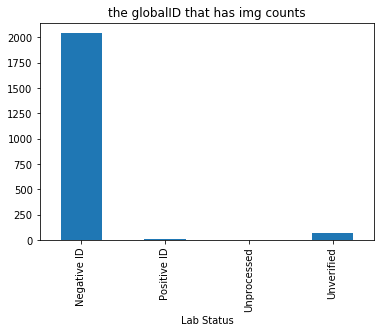

In [20]:
hasimg_csv.groupby('Lab Status')['FileName'].agg('count').plot(kind='bar')
plt.title('the globalID that has img counts')

In [21]:
for name in num_classes:
    copy_img_to_right_dataset(name,hasimg_csv)

In [22]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

In [23]:

cls_mapping = {
    'Negative ID': 0,
    'Positive ID': 1,
    'Unprocessed': 2,
    'Unverified': 2
}

hasimg_csv['Lab Status']=hasimg_csv['Lab Status'].map(cls_mapping)
hasimg_csv=hasimg_csv.sort_values(by='Detection Date')
hasimg_csv.head(3)
hasimg_csv["new_feature"] = 

,GlobalID,FileName,Detection Date,Notes,Lab Status,Lab Comments,Submission Date,Latitude,Longitude
2112,{9E37A2AC-716C-4CE7-82F2-C29BE18253FA},ATT86_D544BB88-A508-4DB5-807F-E9AB6EAF427E.jpg,2010-02-20,I saw on the trail/walking path near Lake Chel...,0,This is a Jerusalem cricket (Stenopelmatus):,2020-05-02,47.780824,-120.022073
2523,{C10A6385-1A9E-407C-B704-D4C92E0AD487},ATT75_inbound4940667611353223578.jpg,2012-07-19,I found this dead outside of my business years...,0,"It's a cicada killer wasp, a harmless (but sca...",2020-04-21,46.825939,-119.928915
2601,{C7196F09-439A-4BC9-A8ED-E968F3E85DBF},ATT3173_Screenshot_20201003-200819.png,2012-07-20,Date approx. Honeybees (about 20) gathering fr...,2,Thanks for the submission. It is hard to detec...,2020-10-04,46.714390,-122.983354
1953,{936ED6CF-642D-4FBD-9AC9-69BED4D4109C},ATT53_IMG_4974.jpg,2013-08-31,Photo taken August of 2013 at Moran State Park...,0,Native wood wasp.,2020-04-14,48.653248,-122.850697
1993,{959164C7-204C-487F-9995-5116CDB56869},ATT3260_694913C9-97C9-4FB0-BA2B-2C2E864BC26D.jpg,2015-04-07,As noted...this dates back to 2015...but it su...,0,Thanks for the submission. That is a yellow ja...,2020-10-16,48.988013,-122.776979


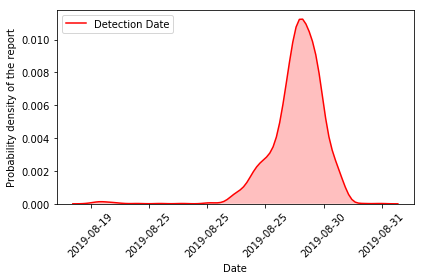

In [88]:
IGNORE_EARLIER_REPORT = 30

def plot_report_kde(hasimg_csv, save=True, name="report_kde"):
    date_sq = hasimg_csv["Detection Date"].iloc[IGNORE_EARLIER_REPORT:]
    
    ax = sns.kdeplot((date_sq-date_sq.iloc[0])/pd.Timedelta(days=1), shade=True, color='r')
    ax.set_xticklabels(list(date_sq.dt.strftime('%Y-%m-%d')))
    ax.set_xlabel("Date")
    ax.set_ylabel("Probability density of the report")
    plt.xticks(rotation=45) 
    plt.tight_layout()
    if save:
        pdf = PdfPages("./img//{}.pdf".format(name))
        pdf.savefig()
        plt.show()
        pdf.close()
    else:
        plt.show()
    plt.close()
    
    
plot_report_kde(hasimg_csv)

In [ ]:
START_DATE = pd.Timestamp('2019-01-01')
def plot_report_kdes(hasimg_csv, save=True, name="report_kde"):
    positive_csv = hasimg_csv[hasimg_csv['Lab Status']==1]
    negative_csv = hasimg_csv[hasimg_csv['Lab Status']==0]
    unverified_csv = hasimg_csv[hasimg_csv['Lab Status']==2]
    
    pos_date_sq = positive_csv["Detection Date"].iloc[IGNORE_EARLIER_REPORT:]
    neg_date_sq = negative_csv["Detection Date"].iloc[IGNORE_EARLIER_REPORT:]
    unv_date_sq = unverified_csv["Detection Date"].iloc[IGNORE_EARLIER_REPORT:]
    earliest = pos_date_sq.iloc[0]
    
    fig, ax = plt.subplots()
    sns.kdeplot((pos_date_sq-earliest)/pd.Timedelta(days=1), shade=True, ax=ax
                 #, color='r'
                )
    sns.kdeplot((neg_date_sq-earliest)/pd.Timedelta(days=1), shade=True, ax=ax
                 #, color='r'
                )
    sns.kdeplot((unv_date_sq-earliest)/pd.Timedelta(days=1), shade=True, ax=ax
                 #, color='r'
                )
    ax.set_xticklabels(list(date_sq.dt.strftime('%Y-%m-%d')))
    ax.set_xlabel("Date")
    ax.set_ylabel("Probability density of the report")
    plt.xticks(rotation=45) 
    plt.tight_layout()
    if save:
        pdf = PdfPages("./img//{}.pdf".format(name))
        pdf.savefig()
        plt.show()
        pdf.close()
    else:
        plt.show()
    plt.close()

In [ ]:
date_sq = hasimg_csv["Detection Date"].iloc[IGNORE_EARLIER_REPORT:]
date_sq.iloc[0]
plot_report_kde(date_sq)

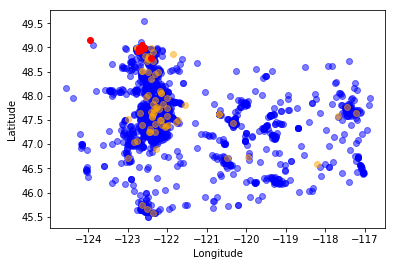

In [24]:
def plot_map(hasimg_csv, save=True, name="map"):
    # print(station["classID"])
    positive_csv = hasimg_csv[hasimg_csv['Lab Status']==1]
    negative_csv = hasimg_csv[hasimg_csv['Lab Status']==0]
    unverified_csv = hasimg_csv[hasimg_csv['Lab Status']==2]
    plt.figure()
    plt.scatter(negative_csv['Longitude'], negative_csv['Latitude'],c='b',alpha=.5)
    plt.scatter(unverified_csv['Longitude'], unverified_csv['Latitude'],c='orange',alpha=.5)
    plt.scatter(positive_csv['Longitude'], positive_csv['Latitude'],c='r')
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    if save:
        pdf = PdfPages("./img//{}.pdf".format(name))
        pdf.savefig()
        plt.show()
        pdf.close()
    else:
        plt.show()
    plt.close()

plot_map(hasimg_csv)

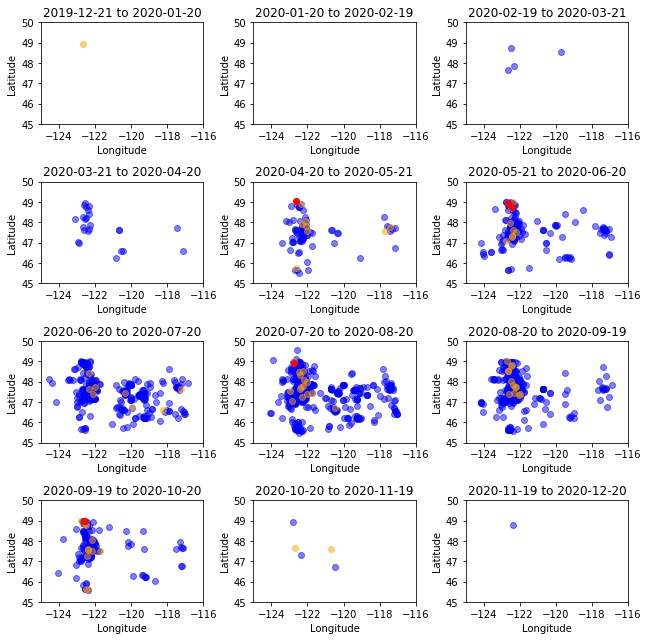

In [89]:
def plot_maps(hasimg_csv, n=12, timespan=None, save=True, name="maps"):
    # print(station["classID"])
    latest=hasimg_csv["Detection Date"].iloc[-1]
    if timespan is None:
        earliest = hasimg_csv["Detection Date"].iloc[0]
        timespan = latest-earliest
    else:
        earliest = latest-timespan
    timestep=timespan/n
    fig, axs = plt.subplots(n//3, 3, figsize=(9, 3*n/4))
    for i in range(n):
        begin = earliest+timestep*i
        end = earliest+timestep*(i+1)
        time_silce=hasimg_csv[(hasimg_csv["Detection Date"]>begin) & (hasimg_csv["Detection Date"]<end)]
        positive_csv = time_silce[time_silce['Lab Status']==1]
        negative_csv = time_silce[time_silce['Lab Status']==0]
        unverified_csv = time_silce[time_silce['Lab Status']==2]
        axs[i//3, i%3].scatter(negative_csv['Longitude'], negative_csv['Latitude'],c='b',alpha=.5)
        axs[i//3, i%3].scatter(unverified_csv['Longitude'], unverified_csv['Latitude'],c='orange',alpha=.5)
        axs[i//3, i%3].scatter(positive_csv['Longitude'], positive_csv['Latitude'],c='r')
        axs[i//3, i%3].set_xlim((-125, -116))
        axs[i//3, i%3].set_ylim((45, 50))
        axs[i//3, i%3].set_xlabel("Longitude")
        axs[i//3, i%3].set_ylabel("Latitude")
        axs[i//3, i%3].set_title('{} to {}'.format(begin.strftime('%Y-%m-%d'), end.strftime('%Y-%m-%d')))
    plt.title("Report occurred within a time period")
    plt.tight_layout()
    if save:
        pdf = PdfPages("./img//{}.pdf".format(name))
        pdf.savefig()
        plt.show()
        pdf.close()
    else:
        plt.show()
    plt.close()

plot_maps(hasimg_csv, timespan=pd.Timedelta(days=365))